# NLST Predictions Match

Match and put together NLST predictions for Kiran, Thijmen, PanCan and Sybil (after those predictions have ran).

In [1]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set_style("white")
from evalutils.roc import get_bootstrapped_roc_ci_curves
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn.metrics as skl_metrics

## directory where results are
LOCAL_PC = False
root_dir = "/mnt/w" if LOCAL_PC else "/data/bodyct"
EXPERIMENT_DIR = f"{root_dir}/experiments/lung-malignancy-fairness-shaurya"
NLST_PREDS = f"{EXPERIMENT_DIR}/nlst-preds"

NLST_PREDS_LOCAL = "/mnt/c/Users/shaur/OneDrive - Radboudumc/Documents - Master - Shaurya Gaur/General/Malignancy-Estimation Results/nlst"
NLST_PREDS = NLST_PREDS_LOCAL

### Kiran and Pancan Results
`NLST_DL_vs_PanCan_Venk21.csv`

In [2]:
kiran_pancan = pd.read_csv(f"{NLST_PREDS}/NLST_DL_vs_PanCan_Venk21.csv")
kiran_pancan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16077 entries, 0 to 16076
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            16077 non-null  int64  
 1   StudyDate            16077 non-null  int64  
 2   SeriesInstanceUID    16077 non-null  object 
 3   CoordX               16077 non-null  float64
 4   CoordY               16077 non-null  float64
 5   CoordZ               16077 non-null  float64
 6   LesionID             16077 non-null  int64  
 7   NoduleType           16077 non-null  object 
 8   Spiculation          16077 non-null  bool   
 9   Diameter [mm]        16077 non-null  float64
 10  Age                  16077 non-null  int64  
 11  Gender               16077 non-null  int64  
 12  FamilyHistoryLungCa  16077 non-null  bool   
 13  Emphysema            16077 non-null  bool   
 14  NoduleInUpperLung    16077 non-null  bool   
 15  NoduleCounts         16077 non-null 

In [3]:
kiran_pancan.groupby('label').nunique()


,PatientID,StudyDate,SeriesInstanceUID,CoordX,CoordY,CoordZ,LesionID,NoduleType,Spiculation,Diameter [mm],...,NoduleInUpperLung,NoduleCounts,SCT_EPI_LOC,xie_gc_gclobe150,loclup,locrup,PanCan2b,DL,NoduleID,AnnotationID
label,,,,,,,,,,,,,,,,,,,,,
0,4596,3,8984,11099,12202,12578,18,5,2,308,...,2,12,7,0,0,0,12978,14820,9304,14828
1,686,3,1199,1225,1236,1231,3,3,2,286,...,2,11,6,6,2,2,1245,1249,720,1249


In [4]:
kiran_pancan = kiran_pancan.sort_values(by='AnnotationID', ascending=True).set_index("AnnotationID")

In [5]:
kiran_rerun = pd.read_csv(f"{NLST_PREDS}/20220816_NLST_Venk21_rerun.csv")
kiran_rerun = kiran_rerun.rename(columns={"Ensemble": "DL"})
kiran_rerun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16077 entries, 0 to 16076
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          16077 non-null  int64  
 1   SeriesInstanceUID  16077 non-null  object 
 2   StudyDate          16077 non-null  int64  
 3   CoordX             16077 non-null  float64
 4   CoordY             16077 non-null  float64
 5   CoordZ             16077 non-null  float64
 6   Diameter [mm]      16077 non-null  float64
 7   NoduleType         16077 non-null  object 
 8   label              16077 non-null  int64  
 9   LesionID           16077 non-null  int64  
 10  NoduleID           16077 non-null  object 
 11  AnnotationID       16077 non-null  object 
 12  DL                 16077 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.6+ MB


In [6]:
kiran_rerun.groupby('label').nunique()

,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,Diameter [mm],NoduleType,LesionID,NoduleID,AnnotationID,DL
label,,,,,,,,,,,,
0,4596,8984,3,11099,12202,12578,308,5,18,9304,14828,14828
1,686,1199,3,1225,1236,1231,286,3,3,720,1249,1249


In [7]:
kiran_rerun = kiran_rerun.sort_values(by='AnnotationID', ascending=True).set_index("AnnotationID")

### See if Kiran's Rerun Matches the Kiran v. Pancan results

In [8]:
kiran_cols = kiran_rerun.columns.to_list()
kiran_cols

['PatientID',
 'SeriesInstanceUID',
 'StudyDate',
 'CoordX',
 'CoordY',
 'CoordZ',
 'Diameter [mm]',
 'NoduleType',
 'label',
 'LesionID',
 'NoduleID',
 'DL']

In [9]:
## Check if Kiran's results line up across both CSVs.
kiran_pancan_subset = kiran_pancan[kiran_cols].sort_values(by='AnnotationID', ascending=True)
# kiran_pancan_subset = kiran_pancan_subset.drop(columns=['DL'])
kiran_pancan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16077 entries, 100012_1_19990102 to 218887_1_19990102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          16077 non-null  int64  
 1   SeriesInstanceUID  16077 non-null  object 
 2   StudyDate          16077 non-null  int64  
 3   CoordX             16077 non-null  float64
 4   CoordY             16077 non-null  float64
 5   CoordZ             16077 non-null  float64
 6   Diameter [mm]      16077 non-null  float64
 7   NoduleType         16077 non-null  object 
 8   label              16077 non-null  int64  
 9   LesionID           16077 non-null  int64  
 10  NoduleID           16077 non-null  object 
 11  DL                 16077 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.6+ MB


In [10]:
kiran_pancan_subset.compare(kiran_rerun)

CoordX       CoordY       CoordZ                  DL  \
                    self other   self other   self other          self   
AnnotationID                                                             
100012_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  9.856393e-01   
100012_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  9.985542e-01   
100019_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  7.203346e-01   
100035_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  3.152690e-04   
100035_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  5.275360e-04   
...                  ...   ...    ...   ...    ...   ...           ...   
218863_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  1.567247e-03   
218863_2_19990102    NaN   NaN    NaN   NaN    NaN   NaN  1.127662e-02   
218863_2_20010102    NaN   NaN    NaN   NaN    NaN   NaN  1.079622e-02   
218866_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  8.857844e-07   
218887_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  1.556763e-06   

                             
                      other  
AnnotationID                 
100012_1_19990102  0.985671  
100012_1_20000102  0.994192  
100019_1_20000102  0.688991  
100035_1_19990102  0.002529  
100035_1_20000102  0.009697  
...                     ...  
218863_1_19990102  0.002304  
218863_2_19990102  0.014281  
218863_2_20010102  0.003797  
218866_1_20000102  0.000026  
218887_1_19990102  0.000085  

[16077 rows x 8 columns]

#### Drop predictions

In [11]:
kiran_rerun_wo_preds = kiran_rerun.drop(columns=['DL'])
kiran_pancan_wo_preds = kiran_pancan_subset.drop(columns='DL')

coord_diffs = kiran_pancan_wo_preds.compare(kiran_rerun_wo_preds)
coord_diffs

CoordX                  CoordY                  CoordZ  \
                         self       other        self       other        self   
AnnotationID                                                                    
101692_1_19990102         NaN         NaN         NaN         NaN -146.089996   
101957_1_19990102         NaN         NaN -131.421738 -131.421738         NaN   
102676_1_20000102         NaN         NaN         NaN         NaN -145.595001   
104248_1_20000102         NaN         NaN -172.488266 -172.488266         NaN   
104248_2_19990102         NaN         NaN -162.213745 -162.213745         NaN   
106194_2_20000102         NaN         NaN   -6.114014   -6.114014         NaN   
106642_1_20010102 -128.460892 -128.460892         NaN         NaN         NaN   
109198_1_19990102         NaN         NaN -190.030533 -190.030533         NaN   
109573_1_19990102         NaN         NaN         NaN         NaN -223.690002   
112575_1_19990102         NaN         NaN         NaN         NaN -307.600006   
113041_2_20000102         NaN         NaN -137.931290 -137.931290         NaN   
114746_1_19990102         NaN         NaN -143.754364 -143.754364         NaN   
114746_1_20000102         NaN         NaN -163.276749 -163.276749         NaN   
115831_1_19990102         NaN         NaN -137.679398 -137.679398         NaN   
115831_1_20000102         NaN         NaN -145.118332 -145.118332         NaN   
116837_1_19990102 -108.358780 -108.358780         NaN         NaN         NaN   
120790_1_19990102         NaN         NaN   62.995483   62.995483         NaN   
122117_1_19990102         NaN         NaN         NaN         NaN  -15.350006   
124190_1_19990102  -51.125961  -51.125961         NaN         NaN         NaN   
124323_1_19990102         NaN         NaN         NaN         NaN -112.619995   
124998_1_19990102         NaN         NaN         NaN         NaN   -7.859995   
126787_1_19990102         NaN         NaN -155.027359 -155.027359         NaN   
126823_1_19990102         NaN         NaN         NaN         NaN -283.600006   
126823_1_20000102         NaN         NaN -140.959915 -140.959915         NaN   
128940_1_19990102         NaN         NaN -148.889313 -148.889313         NaN   
129511_1_20000102         NaN         NaN         NaN         NaN -147.980011   
131611_1_19990102         NaN         NaN         NaN         NaN -100.480003   
131611_1_20000102         NaN         NaN         NaN         NaN -140.279999   
204571_1_19990102         NaN         NaN    5.831635    5.831635         NaN   
205687_1_19990102         NaN         NaN         NaN         NaN -143.194992   
206215_1_19990102         NaN         NaN         NaN         NaN -171.160004   
209119_1_20000102   88.450348   88.450348         NaN         NaN         NaN   
209643_1_19990102         NaN         NaN         NaN         NaN -166.244995   
209643_1_20000102         NaN         NaN         NaN         NaN -178.345001   
210581_1_19990102         NaN         NaN         NaN         NaN -168.494995   
210774_1_19990102         NaN         NaN  -26.682854  -26.682854         NaN   
211814_1_20010102         NaN         NaN -139.639221 -139.639221         NaN   
212202_1_20000102         NaN         NaN         NaN         NaN -141.669998   
212718_1_20000102         NaN         NaN -134.204178 -134.204178         NaN   
213442_1_20000102         NaN         NaN         NaN         NaN -151.794998   
213442_1_20010102         NaN         NaN         NaN         NaN -149.119995   
213510_1_20000102         NaN         NaN -131.503815 -131.503815         NaN   
213544_1_19990102         NaN         NaN -136.994263 -136.994263         NaN   
215969_1_20000102         NaN         NaN         NaN         NaN -154.694992   

                               
                        other  
AnnotationID                   
101692_1_19990102 -146.089996  
101957_1_19990102         NaN  
102676_1_20000102 -145.595001  
104248_1_20000102      

In [12]:
coord_diffs["CoordX_diff"] = coord_diffs["CoordX", "self"] - coord_diffs["CoordX", "other"]
coord_diffs["CoordY_diff"] = coord_diffs["CoordY", "self"] - coord_diffs["CoordY", "other"]
coord_diffs["CoordZ_diff"] = coord_diffs["CoordZ", "self"] - coord_diffs["CoordZ", "other"]
coord_diffs[["CoordX_diff", "CoordY_diff", "CoordZ_diff"]].describe()

,CoordX_diff,CoordY_diff,CoordZ_diff
,,,
count,4.000000e+00,2.000000e+01,2.000000e+01
mean,1.598721e-14,-2.176037e-15,-1.554312e-15
std,1.678947e-14,2.605364e-14,3.289086e-14
min,-7.105427e-15,-2.842171e-14,-2.842171e-14
25%,8.881784e-15,-2.842171e-14,-2.842171e-14
50%,2.131628e-14,1.332268e-15,-2.131628e-14
75%,2.842171e-14,2.842171e-14,2.842171e-14
max,2.842171e-14,2.842171e-14,5.684342e-14


In [13]:
kiran_rerun_wo_coords = kiran_rerun.drop(columns=['CoordX', 'CoordY', 'CoordZ'])
kiran_pancan_wo_coords = kiran_pancan_subset.drop(columns=['CoordX', 'CoordY', 'CoordZ'])

pred_diffs = kiran_pancan_wo_coords.compare(kiran_rerun_wo_coords)
pred_diffs

DL          
                           self     other
AnnotationID                             
100012_1_19990102  9.856393e-01  0.985671
100012_1_20000102  9.985542e-01  0.994192
100019_1_20000102  7.203346e-01  0.688991
100035_1_19990102  3.152690e-04  0.002529
100035_1_20000102  5.275360e-04  0.009697
...                         ...       ...
218863_1_19990102  1.567247e-03  0.002304
218863_2_19990102  1.127662e-02  0.014281
218863_2_20010102  1.079622e-02  0.003797
218866_1_20000102  8.857844e-07  0.000026
218887_1_19990102  1.556763e-06  0.000085

[16077 rows x 2 columns]

In [14]:
pred_diffs["DL_diff"] = pred_diffs["DL", "self"] - pred_diffs["DL", "other"]
pred_diffs["DL_diff_abs"] = abs(pred_diffs["DL_diff"])
pred_diffs[["DL_diff", "DL_diff_abs"]].describe()

,DL_diff,DL_diff_abs
,,
count,16077.000000,1.607700e+04
mean,-0.036692,6.596979e-02
std,0.144521,1.337178e-01
min,-0.975755,3.391535e-12
25%,-0.026556,2.566302e-04
50%,-0.000493,5.384831e-03
75%,0.000034,6.132662e-02
max,0.902938,9.757554e-01


In [15]:
pred_diffs.sort_values(by='DL_diff_abs', ascending=False).head(20)

DL             DL_diff DL_diff_abs
                       self     other                      
AnnotationID                                               
203641_2_19990102  0.020526  0.996281 -0.975755    0.975755
106396_2_19990102  0.025154  0.957037 -0.931883    0.931883
204228_3_20000102  0.013618  0.929715 -0.916097    0.916097
210232_2_20000102  0.044599  0.957699 -0.913099    0.913099
200047_1_20010102  0.071073  0.982822 -0.911749    0.911749
203008_1_19990102  0.036190  0.945469 -0.909279    0.909279
214672_1_19990102  0.025829  0.929623 -0.903793    0.903793
218383_4_20010102  0.910167  0.007229  0.902938    0.902938
113705_1_20010102  0.008496  0.911409 -0.902913    0.902913
115001_4_20000102  0.014957  0.908043 -0.893086    0.893086
133933_1_20000102  0.036598  0.921834 -0.885236    0.885236
106862_5_20010102  0.053703  0.934705 -0.881003    0.881003
115536_1_20000102  0.024409  0.905174 -0.880765    0.880765
111427_1_19990102  0.013160  0.890726 -0.877566    0.877566
210232_2_19990102  0.105043  0.981230 -0.876187    0.876187
218174_1_20010102  0.060453  0.933392 -0.872938    0.872938
204228_3_19990102  0.015696  0.881084 -0.865388    0.865388
109131_2_19990102  0.022713  0.887313 -0.864599    0.864599
108794_2_20000102  0.069285  0.930374 -0.861089    0.861089
214672_1_20000102  0.085973  0.941424 -0.855451    0.855451

In [16]:
kiran_rerun_wo_coords_preds = kiran_rerun.drop(columns=['DL', 'CoordX', 'CoordY', 'CoordZ'])
kiran_pancan_wo_coords_preds = kiran_pancan_subset.drop(columns=['DL', 'CoordX', 'CoordY', 'CoordZ'])
kiran_pancan_wo_coords_preds.equals(kiran_rerun_wo_coords_preds)

True

### Check which has the ROC curves that match the Venk 21 paper

In [17]:
import utils
from utils import plot_rocs

In [18]:
kiran_pancan["DL_rerun"] = kiran_rerun["DL"]
kiran_pancan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16077 entries, 100012_1_19990102 to 218887_1_19990102
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            16077 non-null  int64  
 1   StudyDate            16077 non-null  int64  
 2   SeriesInstanceUID    16077 non-null  object 
 3   CoordX               16077 non-null  float64
 4   CoordY               16077 non-null  float64
 5   CoordZ               16077 non-null  float64
 6   LesionID             16077 non-null  int64  
 7   NoduleType           16077 non-null  object 
 8   Spiculation          16077 non-null  bool   
 9   Diameter [mm]        16077 non-null  float64
 10  Age                  16077 non-null  int64  
 11  Gender               16077 non-null  int64  
 12  FamilyHistoryLungCa  16077 non-null  bool   
 13  Emphysema            16077 non-null  bool   
 14  NoduleInUpperLung    16077 non-null  bool   
 15  NoduleCounts 

In [19]:
kiran_pancan[["DL", "DL_rerun", "PanCan2b", "label"]].head()

,DL,DL_rerun,PanCan2b,label
AnnotationID,,,,
100012_1_19990102,0.985639,0.985671,0.179158,1
100012_1_20000102,0.998554,0.994192,0.595067,1
100019_1_20000102,0.720335,0.688991,0.090782,0
100035_1_19990102,0.000315,0.002529,0.007053,0
100035_1_20000102,0.000528,0.009697,0.006208,0


In [20]:
pred_cols = ["DL", "DL_rerun", "PanCan2b"]
rocs = {}
for c in pred_cols:
    rocs[c] = get_bootstrapped_roc_ci_curves(
        kiran_pancan[c].values, kiran_pancan['label'].values)

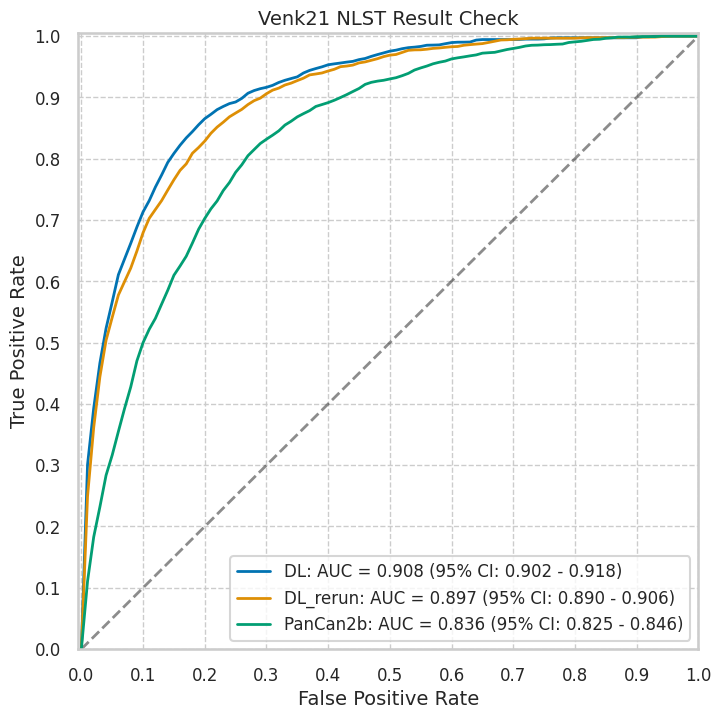

In [21]:
plot_rocs(rocs, 'Venk21 NLST Result Check', figsize=(8,8))

#### From Kiran's 2021 paper:

> By using 10-fold cross validation, the DL algorithm achieved an AUC of 0.91 (95% CI: 0.90, 0.92) in the NLST cohort. The AUC of the PanCan model in the NLST cohort was 0.84 (95% CI: 0.83, 0.85; P , .001). At a specificity of 90%, the sensitivities were 891 of 1249 (71%) and 626 of 1249 (50%) for the DL algorithm and the PanCan model, respectively